# Practical TensorFlow

Main resource: https://cv-tricks.com/artificial-intelligence/deep-learning/deep-learning-frameworks/tensorflow-tutorial/

## Introduction

### What is TensorFlow?
TensorFlow is a library that uses graphs to perform computation. Data is represented in the form of arrays called Tensors. A graph consists of data (tensors) and mathematical operations. The nodes represent the operations while the edges represent the tensors flowing between them.

### TensorFlow Programming
You have to first create a blueprint graph. Then once you run the complete graph inside a session, the variables can then have value.

Abstract --> Defined




In [1]:
# import tensorflow
import tensorflow as tf

/home/kwan/.virtualenvs/dlcv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kwan/.virtualenvs/dlcv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kwan/.virtualenvs/dlcv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kwan/.virtualenvs/dlcv/lib/python3.6/site-packages/tensorf

## Graph

The graph is the backbone of TensorFlow. Everything that happens in the code can be found on a default graph that TensorFlow provides.

In [2]:
graph = tf.get_default_graph()

Get list of operations. Output will be empty as there is nothing in the graph.

In [3]:
graph.get_operations()

[]

Print name of operations in graph. Output will again be empty.

In [4]:
for op in graph.get_operations():
    print(op.name)

Multiple graphs can also be created.

## Session

Once a graph is abstractly defined, a session is needed to run the defined operations. This is created independently of a graph.

Graph = blueprint; session = construction site.

Create a session:

In [5]:
sess = tf.Session()
# code
# code
sess.close()

Whenever a session is created, don't forget to close it! Another option is to use the Python `with` block, which will automatically close the session. This is the most common method.

In [6]:
with tf.Session as sess:
    sess.run(operation)

AttributeError: __enter__

## Tensors

Data is stored in tensors, which are multidimensional arrays.

### Constants
Values that can't be changed. Declared with `tf.constant`

In [7]:
# declare constant
a = tf.constant(1.0)
a

<tf.Tensor 'Const:0' shape=() dtype=float32>

This declared constant cannot be printed or accessed unless run inside a session.

In [8]:
# run session and print constant
with tf.Session() as sess:
    print(sess.run(a))

1.0


### Variables

Can hold different values. Declared with `tf.variables`.

In [9]:
# declare variable
b = tf.Variable(2.0, name='b')
b

<tf.Variable 'b:0' shape=() dtype=float32_ref>

Before running the session, variables must be separately initialized with an init op (init operation). All declared variables can be initialized in one go with `tf.global_variables_initializer()`.

In [10]:
# setup variable init
init_op = tf.global_variables_initializer()

In [11]:
# run session, init variable, then access it
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(b))

2.0


In [12]:
# print operations
graph = tf. get_default_graph()
for op in graph.get_operations():
    print(op.name)

Const
b/initial_value
b
b/Assign
b/read
init


If a constant or variable is declared multiple times (even though the same value), it will also be added to the graph multiple times.

In [13]:
# declare constant a again, but this time also give it a name
a = tf.constant(1.0, name='a')
# declare variable b again
b = tf.Variable(2.0, name='b')

# setup variable init
init_op = tf.global_variables_initializer()

# print operations
graph = tf. get_default_graph()
for op in graph.get_operations():
    print(op.name)


Const
b/initial_value
b
b/Assign
b/read
init
a
b_1/initial_value
b_1
b_1/Assign
b_1/read
init_1


The complete graph network can be visualized with TensorBoard. The tool can also aid in visualizing the training process of a network.

### Placeholders

Tensors that still needs to be initialized and injected with a value. Think of it as empty variables. Data can be injected when the code is running in a session, often times it is used for training data. To feed data into a placeholder, `feed_dict` can be used. It holds data in key value pairs.

In [14]:
a = tf.placeholder("float")
b = tf.placeholder("float", name="b_placeholder")
y = tf.multiply(a, b)

# normally feed_dict loads training data from a folder, but here data is generated
feed_dict = {a:2, b:3} 
with tf.Session() as sess:
    print(sess.run(y, feed_dict))

6.0


## Device

With TensorFlow, code can be run on either gpu, cpu, or clusters of gpus, etc. With in-built capabilities, the device to use can be selected. 

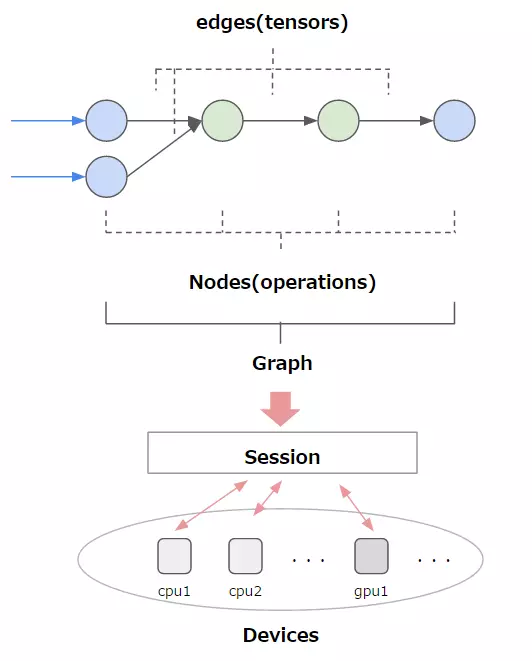

# Tutorial: Linear Regression Example

This section will write TensorFlow code to perform linear regression.

## Toolbox
Here are the basic TensorFlow functions that will be used:

### Random normal distribution
`random_normal` will be used to generate random values from a normal distribution. 

The example below generates variable array of size 784x10 filled with random values picked from a normal distribution with standard deviation of 0.01.

In [15]:
w = tf.Variable(tf.random_normal([784, 10], stddev=0.01))

### Mean
`reduce_mean` will be used to calculate the mean of an array.



In [16]:
b = tf.Variable([10,20,30,40,50,60], name='t')
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(tf.reduce_mean(b)))

35


### ArgMax

Similar to Python's `argmax`, the function will get the index for the maximum value from a tensor along an axis.

In [17]:
a = [ [0.1, 0.2, 0.3 ],
      [20, 2, 3 ]
    ]
b = tf.Variable(a, name='b')
init_op = tf.global_variables_initializer()
print(b)

with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(b))
    print(sess.run(tf.argmax(b,1))) # get index of the maximum value in each row
    print(sess.run(tf.argmax(b,0))) # get index of the maximum value in each column

<tf.Variable 'b_2:0' shape=(2, 3) dtype=float32_ref>
[[ 0.1  0.2  0.3]
 [20.   2.   3. ]]
[2 0]
[1 1 1]


## Linear Regression Problem

Finally we will perform linear regression. In this example, we will create 100 data points and try to fit it to a line.

### Create training set

`trainX` will be our training dataset. The values will be between -1 and 1, while the values of `trainY` will be 3 times that of `trainX` with additional randomness.

In [18]:
# import modules
import tensorflow as tf
import numpy as np

In [19]:
trainX = np.linspace(-1, 1, 101)
trainY = 3 * trainX + np.random.randn(*trainX.shape) * 0.33

In [20]:
# trainX.shape is a tuple, by adding * in front, it becomes integers
print(trainX.shape, type(trainX.shape))
print(*trainX.shape, type(*trainX.shape))

(101,) <class 'tuple'>
101 <class 'int'>


### Declare placeholders


In [21]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

### Modeling
The model for linear regression is `y_model = w*x`, in which the value of w, or the weight, needs to be calculated through the model. w will be first initialized at 0. 

Cost = (Y - y_model)^2

We will use the Gradient Descent Optimizer to minimize the cost. This optimizer comes with TensorFlow. It will calculate and update the cost gradient every iteration. We will use a learning rate of 0.01 and run our training operation in a loop.


In [22]:
w = tf.Variable(0.0, name="weights")
y_model = tf.multiply(X, w)

cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

### Training

The graph is defined, but no computation has been done. 
Create and run a session for computation.

In [23]:
# first create variable initializer operator
init_op = tf.global_variables_initializer()

Training values are injected into the training operation with `feed_dict`. The value of our weight is printed.

In [24]:
# create and run session
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(100):
        for (x,y) in zip(trainX, trainY):
            sess.run(train_op, feed_dict={X: x, Y: y})
    print(sess.run(w))

3.0201066


### Experimental Exercise
What would be the output of w if we create a new session block now?

In [26]:
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(w))

0.0


It is 0.0, because TensorFlow uses symbolic computation. Operations do not exist out of sessions. Once we quite the previous session, the operations disappear.